# Air Traffic Delays - July 2015
Source: US DOT

MIDS Bridge Project II

Laura Williams
Geoff Stirling
John Schoen


## Overview


Air traffic delays are not just an inconvenience to passengers. Last year, airline flight delays and cancellations cost American passengers more than $2 billion in out-of-pocket costs for hotels, meals, alternate travel arrangements, etc. 
We decided to take a closer look at the nature and potential causes of these delays with an analysis of U.S. Department of Transportation data on flight delays for the month of July, 2015, at the height of the summer travel season.

SOURCE: https://www.rita.dot.gov/bts/data_and_statistics/by_mode/airline_and_airports/airline_delay.html


## Methodology

We applied a very simple analysis to the dataset, which covered 500,000+ unique flights between two U.S. airports at some time during the month. The dataset initially included 28 columns, which recordd arrival and departure times, unique IDS for airports, airlines, departure and arrival cities, aiport codes, txi times, infliught times, flight distance, etc.
A quick analysis demonstrated that the difference betwee departure delays and arrival delays was very small, so we chose to focus on arival delays as the basic measure of on-time performance.
We were also able to eliminate duplicate columns (FIPS codes, multiplecarrier IDS, etc) to simplfy or dataset and improve the speed and performance of our code blocks.

We began by importing the assigned modules.

In [2]:
import sys

import numpy as np

import pandas as pd

import matplotlib.pyplot as plt

print("Pandas version:", pd.__version__)
print("Numpy version:", np.__version__)
print(sys.version)
%matplotlib inline

Pandas version: 0.17.1
Numpy version: 1.10.1
3.5.1 |Anaconda 2.4.1 (64-bit)| (default, Jan 29 2016, 15:01:46) [MSC v.1900 64 bit (AMD64)]


Here's a preview of the final dataset we chose. We now have days of the week and month, origin and destination airport, aircraft tail number, arrival and departure delays, time_of_day bins and orgin and destination city names (not always the same as airport names in cities with more than one airport.)


In [3]:
flight_data = pd.read_csv('flight_delays_jws.csv')
flight_data.head()


UniqueRecord  DayofMonth  DayOfWeek UniqueCarrier TailNum OriginApt  \
0             1          11          6      American  N870AA       SFO   
1             2          12          7      American  N856AA       SFO   
2             3          13          1      American  N864AA       SFO   
3             4          14          2      American  N861AA       SFO   
4             5          15          3      American  N866AA       SFO   

  DestApt  DepDelay  ArrDelay  ArrDel15count ArrTimeBin  TOTAL FLIGHTS  \
0     DFW        -2       -18              0  1300-1359              1   
1     DFW        -7       -22              0  1300-1359              1   
2     DFW        -2        -6              0  1300-1359              1   
3     DFW        -8       -21              0  1300-1359              1   
4     DFW        -2       -11              0  1300-1359              1   

  OriginCityName        DestCityName  
0   San Francisco  Dallas/Fort Worth  
1   San Francisco  Dallas/Fort Worth  
2   San Francisco  Dallas/Fort Worth  
3   San Francisco  Dallas/Fort Worth  
4   San Francisco  Dallas/Fort Worth

# Worst delayed flights

One of the simplest and most basic questions is also one of themost interesting: which poor traveling souls were subject to the worst inconvenience in trying to get to their destinations? By reading our table into a pandas DataFrame we were able to run a simple sort on the ArrDelay column.
American Airlines came in with the five worst delays for the month, the longest lasting 27.25 hours - or more than a full day. Outlier data like these need to be verfied due to common occurances of "dirty data." In this case, the entry could have recorded the wrong arrival and departure dates - turning what may have been a two-hour delay into an epic travel trahedy.
(Note: for this analysis we encountered a number of Nan records, which could also indicate problems with the reliability of this data set.)



In [4]:
fd_frame = pd.DataFrame.from_csv('flight_delays_jws.csv') 
fd_frame.sort_index(by='ArrDelay')\
                    .dropna()\
                    .tail(5)\

C:\Users\John\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)
  from ipykernel import kernelapp as app


DayofMonth  DayOfWeek UniqueCarrier TailNum OriginApt DestApt  \
UniqueRecord                                                                  
47850                  9          4      American  N798AA       SFO     JFK   
38486                 28          2      American  N7BXAA       ORD     DFW   
15001                  8          3      American  N5DKAA       HNL     LAX   
3116                  18          6      American  N3DUAA       LAS     JFK   
22264                 13          1      American  N3LEAA       IND     LAX   

              DepDelay  ArrDelay  ArrDel15count ArrTimeBin  TOTAL FLIGHTS  \
UniqueRecord                                                                
47850             1176      1167              1  2100-2159              1   
38486             1223      1203              1  1400-1459              1   
15001             1170      1212              1  2100-2159              1   
3116              1393      1364              1  1600-1659              1   
22264             1625      1636              1  2000-2059              1   

             OriginCityName        DestCityName  
UniqueRecord                                     
47850          San Francisco           New York  
38486                Chicago  Dallas/Fort Worth  
15001               Honolulu        Los Angeles  
3116               Las Vegas           New York  
22264           Indianapolis        Los Angeles

# Beating the clock

While American recorded the five worst delays, the airline also logged four of the best early flights for the month. This should not be surprising; as one of the largest airlines with the most flights, the distribution of Early/Late flights will be wider than other, smaller carriers. A better analysis would normalize for the numer of flights. (We tried running the .mean method, but the processing time proved excessive.) 

In [5]:
fd_frame = pd.DataFrame.from_csv('flight_delays_jws.csv') 
fd_frame.sort_index(by='ArrDelay')\
                    .head(5) \
                    

C:\Users\John\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)
  from ipykernel import kernelapp as app


DayofMonth  DayOfWeek UniqueCarrier TailNum OriginApt DestApt  \
UniqueRecord                                                                  
76730                  4          6        Alaska  N513AS       DCA     SEA   
80491                 10          5      American  N596AS       IAD     SEA   
47516                 19          7      American  N794AA       LAX     JFK   
246                   11          6      American  N3JMAA       JFK     SEA   
86508                 28          2      American  N468AS       EWR     SEA   

              DepDelay  ArrDelay  ArrDel15count ArrTimeBin  TOTAL FLIGHTS  \
UniqueRecord                                                                
76730              -13       -73              0  2100-2159              1   
80491              -10       -68              0  2100-2159              1   
47516               -4       -68              0  1700-1759              1   
246                 -3       -65              0  2200-2259              1   
86508              -10       -64              0  2000-2059              1   

             OriginCityName  DestCityName  
UniqueRecord                               
76730             Washington      Seattle  
80491             Washington      Seattle  
47516            Los Angeles     New York  
246                 New York      Seattle  
86508                 Newark      Seattle

## Best Day To Fly

The US air traffic system experiences periods of congestion that will delay flights no matter how well the airline or system is managed. The travelers determine which days are most prone to congestion, we looked at the average delay for all flights on a given weekday. (The sum of minutes would give a erroneous result because there were the month of July 2015 included five Wednesdays, Thursdays and Fridays and only four occurances of the remaining weekdays.)

Wednesday was the worst day for delays, with an average of nearly 10 minutes per flight, while Sunday was the best day, with less than three minutes delay per flight.

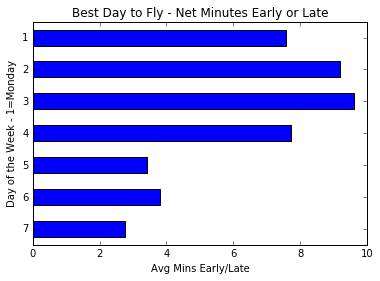

In [6]:
flight_data["ArrDelay"].groupby(flight_data["DayOfWeek"]) \
                                   .mean() \
                                   .sort_index(ascending = False) \
                                   .plot(kind = 'barh', title='Best Day to Fly - Net Minutes Early or Late') \
                                   .set(xlabel="Avg Mins Early/Late", ylabel="Day of the Week - 1=Monday")\


plt.savefig('graph1.png')

# Arrive early: Fly on the Fourth of July

It turned out that the ArrDelay series actually records the variance from published schedules, which lets us determine when flights arrived *early.* By taking the agregate of ArrDelay for each day of the month, we were able to see which July day produced the worst delays - and which one included the best on time performance. 
By far, the best day to fly in July is the Fourth - when most Americans are busy swilling beer at a backyard barbeque. On that date last year, U.S. airlines delivered their passengers to their destinations a total of more than 77,000 minutes early - or an average of seven minutes per flight.



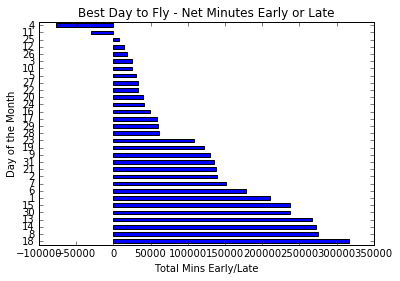

In [7]:
flight_data["ArrDelay"].groupby(flight_data["DayofMonth"]) \
                                   .sum() \
                                   .sort_values(ascending = False) \
                                   .plot(kind = 'barh', title='Best Day to Fly - Net Minutes Early or Late') \
                                   .set(xlabel="Total Mins Early/Late", ylabel="Day of the Month")


plt.savefig('graph1.png')

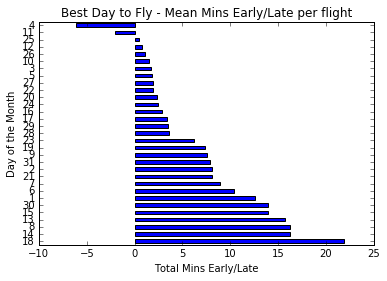

In [8]:
flight_data["ArrDelay"].groupby(flight_data["DayofMonth"]) \
                                   .mean() \
                                   .sort_values(ascending = False) \
                                   .plot(kind = 'barh', title='Best Day to Fly - Mean Mins Early/Late per flight') \
                                   .set(xlabel="Total Mins Early/Late", ylabel="Day of the Month")


plt.savefig('graph1.png')

July 4, 2015 also produced the best single "under-time" record in our dataset. On that date, passengers flying Alaska Air from Washington, DC to Seattle lifted off the runway 13 minutes early and landed a full 73 minutes ahead of schedule.

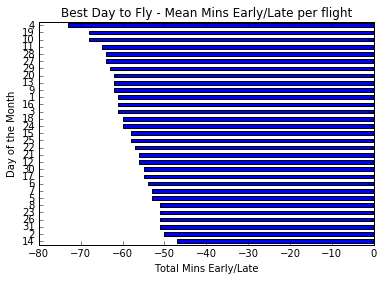

In [9]:
flight_data["ArrDelay"].groupby(flight_data["DayofMonth"]) \
                                   .min() \
                                   .sort_values(ascending = False) \
                                   .plot(kind = 'barh', title='Best Day to Fly - Mean Mins Early/Late per flight') \
                                   .set(xlabel="Total Mins Early/Late", ylabel="Day of the Month")


plt.savefig('graph1.png')

# Watch out for thunderstorms


The worst total delays occured on the 18th of July, a Saturday, which is typically one of the least-delayed days of the week. So what happened on the 18th? 

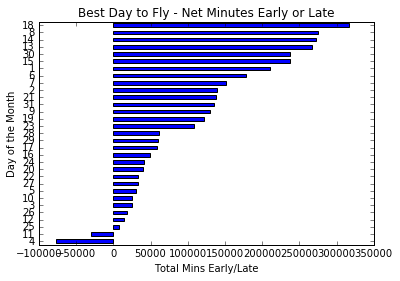

In [11]:
flight_data["ArrDelay"].groupby(flight_data["DayofMonth"]) \
                                   .sum() \
                                   .sort_values(ascending = True) \
                                   .plot(kind = 'barh', title='Best Day to Fly - Net Minutes Early or Late') \
                                   .set(xlabel="Total Mins Early/Late", ylabel="Day of the Month")


plt.savefig('graph1.png')

In [ ]:
Turns out that was a bad day for thunderstorms, based on the NOAA map for that day.

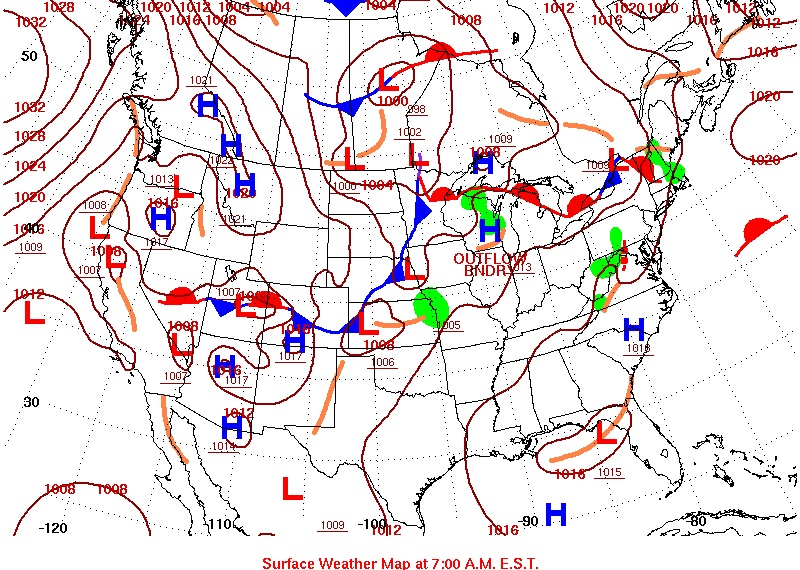

In [10]:
from IPython.display import Image
Image(filename='Hi-LoMap_20150718.jpg')

# To get there early, get up early 

No matter what day of the week you want to fly, you'll get their sooner, on average, if you book the earliest flight possible.

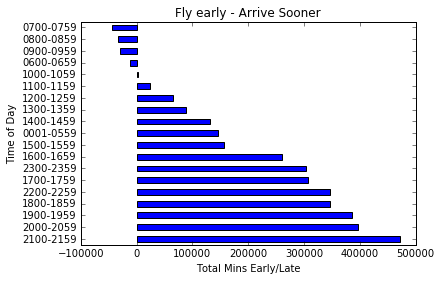

In [19]:
flight_data["ArrDelay"].groupby(flight_data["ArrTimeBin"]) \
                                   .sum() \
                                   .sort_values(ascending = False) \
                                   .plot(kind = 'barh', title='Fly early - Arrive Sooner') \
                                   .set(xlabel="Total Mins Early/Late", ylabel="Time of Day")


plt.savefig('graph4.png')

# Beater airplanes

Equipment problems are also a major cause of flight delays. So we wanted to know which aircraft had the worst on-time records.  Here are the tail numbers to watch out for. (Not that you can look up tail numbers on Expedia.)

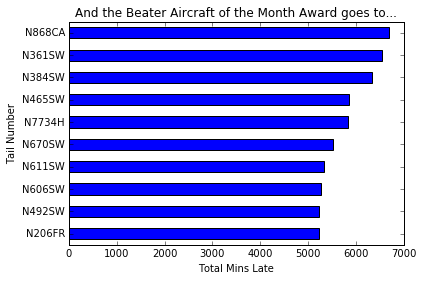

In [14]:
 flight_data["ArrDelay"].groupby(flight_data["TailNum"]) \
                                   .sum() \
                                   .sort_values(ascending = True) \
                                   .tail(10) \
                                   .plot(kind = 'barh', title='And the Beater Aircraft of the Month Award goes to...') \
                                   .set(xlabel="Total Mins Late", ylabel="Tail Number")


plt.savefig('graph2.png')

# Worst airline

All airlines have to deal with bad weather, maintenance issues and systemwide congestion. Some handl it better than others. Looking at the net minutes of early/late arrivals, Southwest wins the prize for the biggest cumulative dleays - more than twice as much as the runner-up, United.
In July 2015, Southwest kept its passengers behind schedule by a net total of some 1.2 million minutes - or 20,000 hours, 833 days, and 2.28 years. All in one month.

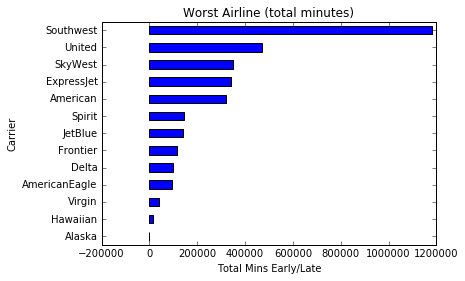

In [21]:
 flight_data["ArrDelay"].groupby(flight_data["UniqueCarrier"]) \
                                   .sum() \
                                   .sort_values(ascending = True) \
                                   .plot(kind = 'barh', title='Worst Airline (total minutes)') \
                                   .set(xlabel="Total Mins Early/Late", ylabel="Carrier")


plt.savefig('graph3.png')

On the other hand, looking at average delays per flight, Frontier leads (or trails) the pack.

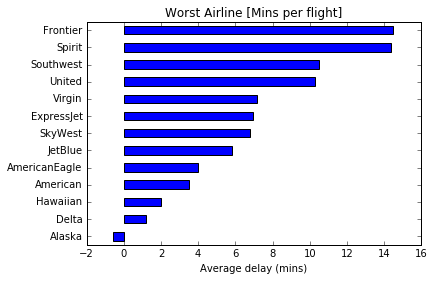

In [23]:
flight_data.ArrDelay.groupby(flight_data.UniqueCarrier) \
                                   .mean() \
                                   .sort_values(ascending = True) \
                                   .plot(kind = 'barh', title='Worst Airline [Mins per flight]') \
                                   .set(xlabel="Average delay (mins)", ylabel="")